# Instrument Data Access and Assignment

In [1]:
import datetime as dt
import numpy as np

In [2]:
import pysat

In [3]:
# Set data directory if user hasn't already set one
if len(pysat.params['data_dirs']) == 0:
    # Set a directory for pysat to use for data
    pysat.params['data_dirs'] = '~/shared/pysatDemo'
else:
    print('pysat directory has been set previously. Leaving unchanged.')

pysat directory has been set previously. Leaving unchanged.


In [5]:
# Create test Instrument
inst = pysat.Instrument('pysat', 'testing')

# Load data
inst.load(date=inst.files.start_date)

/Users/jmsmit37/anaconda3/envs/pyhc/lib/python3.10/site-packages/pysat/instruments/methods/testing.py:584: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  index = pds.date_range(start=start_date, end=end_date, freq=freq)


In [6]:
# Assign new variables
inst['new_mlt'] = inst['mlt']

In [7]:
# Partially assign data
idx, = np.where(inst['mlt'] > 23.)
inst[idx, 'mlt'] = np.arange(len(idx))

<Axes: xlabel='Epoch'>

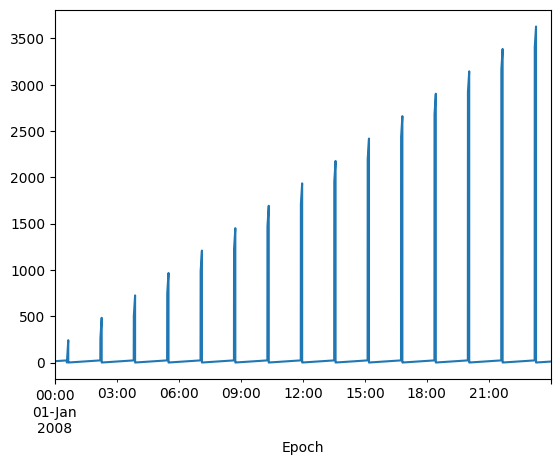

In [8]:
# Verify that magnetic local time signal now has a series of increasing spikes
inst['mlt'].plot()

In [ ]:
# Access subset of data
inst[idx]

In [ ]:
# Downselect by index and variable name
inst[idx, ['mlt', 'slt']]

In [ ]:
# Downselect by datetime range and variable name
inst[inst.index[0]:inst.index[0] + dt.timedelta(seconds=15), ['mlt', 'slt']]